<h2>ToDo</h2>
<ul>
    <li>obtain r from multi-synapse model</li>
    <li>check, whether additive model makes sense (and whether hierarchical inference is even in here?!)</li>
    <li>ask for estimate of layer borders (current density estimate) and implement</li>
    <li>include fraction of silent neurons (~70% in CTKO, ~30% in WT, all exc, not much data in inhib)</li>
    <li>run inference without layers -> any effect between WT and cTKO?</li>
    <li>find if there is an effect on NMDA (ratio, timeconstant. ...)</li>
    <li>implement slicing data along up/down states</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io as sio
import os, sys

In [2]:
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)
from empirical.readData import *
from inference.run_inference import *
from DM_theory import *

In [3]:
import pymc3 as pm
import arviz as az
import theano.tensor as tt
import ipywidgets as widgets

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)

from inference import *
from empirical.model import *

<h1>Data preprocessing</h1>
<p>Data can be read in from three different sources by according functions:
<ul>
    <li><code>xlsx_data</code>: empirical data from excel</li>
    <li><code>mat_data</code>: empirical data from mat-file</li>
    <li><code>artificial_data</code>: artificially generated data</li>
</ul>
The final data will contain a multi-dimensional array of firing rates with the format:
<pre>[animal type X number animals X number layers X number clusters X number neurons]</pre>
</p>

In [6]:
#mP_Ca = ModelParams('empirical',filePath='../../data/BuscheLab/spiking_data_for_modeling_with_depth.mat',plot=True)
mP = ModelParams('empirical',filePath='../../data/BuscheLab/2P_data.xlsx',population_keys=['mouse type','animal'])

mP_withSilent = ModelParams('empirical',filePath='../../data/BuscheLab/2P_data.xlsx',population_keys=['mouse type','animal'])
mP_withSilent.rates[mP_withSilent.rates==0] = 1/600.

In [ ]:
def run_inference(filePath='../../data/BuscheLab/2P_data.xlsx',tune=20000,draws=10000,include_silent=False):
    I = Inference()
    I.load_data('empirical',filePath=filePath,include_silent=include_silent)
    I.set_model('selfcon')
    I.run_on_data(tune=tune,draws=draws)
    return I

I = run_inference(include_silent=False)
I_silent = run_inference(include_silent=True)

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/empirical/readData.py:176: PerformanceWarning: indexing past lexsort depth may impact performance.
  keys = np.unique(list(data[selector].columns.get_level_values(this_level)))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/empirical/readData.py:176: PerformanceWarning: indexing past lexsort depth may impact performance.
  keys = np.unique(list(data[selector].columns.get_level_values(this_level)))


expanding @ lvl animal with keys: ['20180325 (app ko7 739)' '20180325A (app ko8 740)'
 '20180402A (app ko13 734)' '20180419 (app ko14 756)'], selectors: ('LM (APLP1 KO)',)
expanding @ lvl animal with keys: ['20180310A' '20180310B' '20180312A' '20180401'], selectors: ('WT',)
zeros in data: 1480
name: gamma
{'mu': 1.5, 'sigma': 1.0, 'sigma_animal': 1.0, 'prior': 'Normal'}
prior animal (final) __str__ = [370  15]
name: delta
{'mu': 4.0, 'sigma': 2.0, 'sigma_animal': 1.0, 'prior': 'Normal'}
prior animal (final) __str__ = [370  15]
name: nu_max
{'mu': 60.0, 'sigma': 20.0, 'sigma_animal': 5.0, 'prior': 'Normal'}
prior animal (final) __str__ = [370  15]
logP __str__ = [-0.92724267 -0.92724267 -0.92724267 ... -3.56940472 -3.6462295
 -3.79297369]
logP __str__ = [-0.92724267 -0.92724267 -0.92724267 ... -3.56940472 -3.6462295
 -3.79297369]
logP __str__ = [-0.92724267 -0.92724267 -0.92724267 ... -3.56940472 -3.6462295
 -3.79297369]


In [16]:
display(az.summary(I.trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"gamma_population[0,0]",0.927,0.445,0.132,1.801,0.091,0.065,24.0,138.0,1.11
"gamma_population[1,0]",1.223,0.417,0.424,1.986,0.028,0.020,217.0,4901.0,1.02
"gamma_population[2,0]",1.433,0.416,0.665,2.234,0.044,0.031,89.0,4107.0,1.03
"gamma[0,0]",2.830,0.150,2.557,3.129,0.048,0.035,10.0,34.0,1.35
"gamma[0,1]",2.620,0.155,2.289,2.909,0.052,0.039,9.0,13.0,1.39
"gamma[0,2]",2.892,0.154,2.623,3.242,0.057,0.042,8.0,26.0,1.49
"gamma[0,3]",3.050,0.144,2.802,3.339,0.047,0.034,10.0,59.0,1.34
"gamma[0,4]",1.684,1.070,0.044,3.482,0.517,0.394,4.0,11.0,3.08
"gamma[1,0]",3.154,0.158,2.862,3.442,0.048,0.035,12.0,45.0,1.27
"gamma[1,1]",3.151,0.127,2.909,3.384,0.028,0.020,22.0,73.0,1.15


<h1>Model definition</h1>

In [5]:
##### currently issues: ~99% of traces diverge -> pole is difficult to fit
trace = run_on_data(mP,draws=5000,tune=10000,loadPath='results_xls_noSilent.nc')
trace_silent = run_on_data(mP_withSilent,draws=5000,tune=10000,loadPath='results_xls_trace.nc')
trace_Ca = run_on_data(mP_Ca,draws=5000,tune=10000,loadPath='results_Ca_trace.nc')
traces = [trace,trace_silent,trace_Ca]

In [5]:
##### currently issues: ~99% of traces diverge -> pole is difficult to fit
#trace = run_on_data(mP,draws=5000,tune=10000,savePath='results_xls_noSilent.nc')
trace_silent = run_on_data(mP_withSilent,draws=500,tune=1000,savePath='test_results_xls_trace.nc')
#trace_Ca = run_on_data(mP_Ca,draws=5000,tune=10000,loadPath='results_Ca_trace.nc',)


gamma shape __str__ = [370  13   1   1]
delta shape __str__ = [370  13   1   1]
nu __str__ = [370  13   1   1]
logP minimum __str__ = -3.5173483993886046
logP __str__ = [ 1.33647902  1.33647902  1.33647902 ... -3.45596717 -3.46996258
 -3.492042  ]
logP minimum __str__ = -3.5173483993886046
logP __str__ = [ 1.33647902  1.33647902  1.33647902 ... -3.45596717 -3.46996258
 -3.492042  ]
logP minimum __str__ = -3.5173483993886046
logP __str__ = [ 1.33647902  1.33647902  1.33647902 ... -3.45596717 -3.46996258
 -3.492042  ]


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [nu_max, sigma_nu_max, mu_nu_max, delta, delta_delta_layer, delta_base, sigma_delta, gamma, delta_gamma_layer, gamma_base, sigma_gamma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 914 seconds.
There were 461 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6731458907334789, but should be close to 0.8. Try to increase the number of tuning steps.
There were 488 divergences after tuning. Increase `target_accept` or reparameterize.
There were 468 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5196269504985542, but should be close to 0.8. Try to increase the number of tuning steps.
There were 489 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
traces = [I.trace,I_silent.trace]

In [ ]:
fig,ax = plt.subplots(1,len(traces),figsize=(7,2.5))
if len(traces)==1:
    ax = [ax]
for j,t in enumerate(traces):
    for i in range(4):
        ax[j].plot(t.log_likelihood['logP'][i,:,0])
ax[0].set_title('without silent')
ax[1].set_title('with silent')
plt.setp(ax[0],xlabel='draw step',ylabel='loglikelihood')
plt.setp(ax[1],xlabel='draw step')

plt.tight_layout()
plt.show()


In [1]:
## I.load_data('empirical',filePath='../../data/BuscheLab/2P_data.xlsx')
data_observed = I.data[I.data_mask]
#data_observed = data_observed[data_observed>0.01]

para_steps = 51
paras = {
    'gamma': 1.5,
    'delta': 5.,
    'nu_max': 40.
}

sim = {
    'first': {
        'key':'gamma',
        'val': np.linspace(0.5,3.,para_steps)
    },
    'second': {
        'key': 'nu_max',
        'val': np.linspace(10,100.,para_steps)
    }
}

paras[sim['first']['key']] = sim['first']['val']
paras[sim['second']['key']] = sim['second']['val']

d = np.tile(data_observed,(para_steps,1,1))

for key in paras:
    paras[key] = np.tile(paras[key],(1,1,1)).T

paras[sim['first']['key']] = np.transpose(paras[sim['first']['key']],(1,0,2))

logp = logp_nu(d,paras['gamma'],paras['delta'],paras['nu_max'])
print(logp.shape)
print(d.shape)
#logp[...,data_observed<0.01] = logp[...,data_observed<0.01]#*0.1
logp_sum = logp.sum(axis=2)

X,Y = np.meshgrid(sim['first']['val'],sim['second']['val'])

NameError: name 'I' is not defined

In [ ]:
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

plt.ion()
fig = plt.figure(figsize=(10,4))

ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
ax_cumsum = fig.add_subplot(1, 2, 2)

ax_3d.plot_surface(X,Y,logp_sum,alpha=0.5)

global pos, dist
pos = ax_3d.scatter(sim['first']['val'][15],sim['second']['val'][15],logp_sum[15,15],color='r')
plt.setp(ax_3d,xlabel=f'$\\{sim["first"]["key"]}$',ylabel=f'$\\{sim["second"]["key"]}$',zlim=[-10000,2000])

x_arr = np.linspace(0,20,10001)
global par
par = {
    'gamma': 1.5,
    'delta': 5.,
    'nu_max': 40
}
ax_dist = ax_cumsum.twinx()
dist, = ax_dist.plot(x_arr,p_nu(x_arr,**par),'k-')
ax_dist.set_yscale('log')

#plt.scatter(np.arange(len(data_observed)),np.sort(data_observed))
idx_sort = np.argsort(data_observed)
#logp_cum, = ax_cumsum.plot(data_observed[idx_sort], np.cumsum(logp[15,15,idx_sort]),label='cumsum')
logp_cum, = ax_cumsum.plot(data_observed[idx_sort], logp[15,15,idx_sort],color='r',marker='.',linestyle='none',label='cumsum')


def update_plot(idx_first,idx_second):
    global pos, par
    plt.pause(0.1)
    gamma = sim['first']['val'][idx_first]
    nu_max = sim['second']['val'][idx_second]
    print(f"{sim['first']['key']}={gamma}, {sim['second']['key']}={nu_max}, logp={logp_sum[idx_second,idx_first]}")

    #print(sim['first']['val'][idx_first])
    #cumsum = np.cumsum(logp[idx_second,idx_first])
    cumsum = logp[idx_second,idx_first,idx_sort]
    print(f'cumulative sum: {cumsum}')
    logp_cum.set_ydata(cumsum)

    pos.remove()
    pos = ax_3d.scatter(sim['first']['val'][idx_first],sim['second']['val'][idx_second],logp_sum[idx_second,idx_first],color='r',marker='D',s=20)

    par[sim['first']['key']] = sim['first']['val'][idx_first]
    par[sim['second']['key']] = sim['second']['val'][idx_second]

    dist.set_ydata(p_nu(x_arr,**par))

    #pos._offsets3d = (gamma,
    #                  nu_max,
    #                  logp_sum[idx_first,idx_second])
    #pos.set_xdata(sim['first']['val'][idx_first])
    #pos.set_ydata(sim['second']['val'][idx_second])
    #pos.set_zdata(logp_sum[idx_first,idx_second])
    #plt.setp(ax_cumsum,ylim=[min(np.nanmin(cumsum),
    #                             ax_cumsum.get_ylim()[0]),
    #                         max(np.nanmax(cumsum),
    #                             ax_cumsum.get_ylim()[1])])
    plt.setp(ax_dist,ylim=[10**-4,10**2])
    plt.setp(ax_cumsum,ylim=[np.log(10**-4),np.log(10**2)])

    #print(np.nanmin(cumsum))
    #print(np.nanmax(cumsum))
    #print(ax_cumsum.get_ylim())
    #plt.draw()

plt.legend()
#plt.show()

first_widget = widgets.IntSlider(15,min=0,max=para_steps,step=1,orientation='horizontal',description=f"$\displaystyle \\{sim['first']['key']}$")
second_widget = widgets.IntSlider(15,min=0,max=para_steps,step=1,orientation='horizontal',description=f"$\displaystyle \\{sim['second']['key']}$")
#nu_max_widget = widgets.IntSlider(0,min=0,max=para_steps,step=0.1,orientation='horizontal',description=r'$\displaystyle \nu_{max}$')

widgets.interactive(update_plot,idx_first=first_widget,idx_second=second_widget)
#np.isnan(logp[13,9]).sum()
#plt.tight_layout()

<h1>Display results</h1>

In [19]:
def post_inference(I):
    
    paras = ['gamma','delta','nu_max']
    
    results = {}
    for p in paras:
        
        results[p] = {}
        results[p]['mean'] = I.trace['posterior'][p].values.mean(axis=(0,1))
        results[p]['std'] = I.trace['posterior'][p].values.std(axis=(0,1))
        
    results['N'] = I.data_mask.sum(axis=0)
    
    return results

results = post_inference(I)
#results_silent = post_inference(mP_withSilent,trace_silent)
#results_Ca = post_inference(mP_Ca,trace_Ca)
results_silent = post_inference(I_silent)

In [20]:
np.squeeze(results_silent['nu_max']['mean'])

array([[22.48345426, 24.17775525, 14.79099214, 15.99980325, 32.86432704],
       [20.37262473, 18.29767121, 23.29191746, 26.84539527, 24.76162711],
       [89.38059118, 87.549392  , 92.35321188, 89.12681092, 84.29691621]])

/tmp/ipykernel_16052/2413473921.py:34: RuntimeWarning: Mean of empty slice
  fr = np.array([np.nanmean(row[row>0]) for row in np.squeeze(I.data.T)])
/tmp/ipykernel_16052/2413473921.py:37: RuntimeWarning: Mean of empty slice
  fr_withSilence = np.array([np.nanmean(row[row>0]) for row in np.squeeze(I_silent.data.T)])


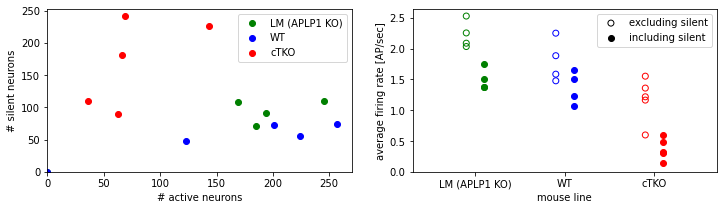

In [45]:
#def plot_numbers(ax,mP,results,str_title='',offset=0.1):

offset=0.1
fig,ax = plt.subplots(1,2,figsize=(12,3))

fr = np.nanmean(I.data,axis=(-1))

types = I.data_df.columns.get_level_values(level=0)

if False:#I.mP._num_clusters>1:
    fr_data_exc = []
    fr_data_inh = []

    for l in range(mP._num_layers):
        ax[0].scatter(results['N'][:,l,1],results['N'][:,l,0],label=f'layer {l+1}')

        fr_data_exc.append(fr[~np.isnan(fr[:,l,0]),l,0])
        fr_data_inh.append(fr[~np.isnan(fr[:,l,1]),l,1])

    ax[1].boxplot(fr_data_exc,positions=np.arange(3)-0.1,widths=0.2,notch=True,patch_artist=True,
                boxprops=dict(color='k'),
             flierprops=dict(color='k', markeredgecolor='k'))
    ax[1].boxplot(fr_data_inh,positions=np.arange(3)+0.1,widths=0.2,notch=True,patch_artist=True,
            boxprops=dict(facecolor='r', color='r'),
             flierprops=dict(color='r', markeredgecolor='r'))

    plt.setp(ax[0],xlabel='# inhibitory neurons',ylabel='# excitatory neurons')
    plt.setp(ax[1],xticks=np.arange(3),xticklabels=np.arange(1,4),
            xlabel='layer',ylabel='average firing rate [AP/sec]')

else:

    col = ['g','b','r']
    fr = np.array([np.nanmean(row[row>0]) for row in np.squeeze(I.data.T)])
    results['fr'] = fr
    
    fr_withSilence = np.array([np.nanmean(row[row>0]) for row in np.squeeze(I_silent.data.T)])
    results_silent['fr'] = fr_withSilence
    
    silence = np.squeeze(I.data==0).sum(0)
    for i,t in enumerate(np.unique(types)):
        idx_type = types==t
        
        ax[0].scatter(results['N'][idx_type],silence[idx_type],color=col[i],label=t)

        ax[1].scatter(np.array([i]*len(fr[idx_type])).astype('float')-offset,fr[idx_type],color=col[i],facecolor='none')
        ax[1].scatter(np.array([i]*len(fr[idx_type])).astype('float')+offset,fr_withSilence[idx_type],color=col[i])
        #ax[1].boxplot(fr[idx_type],positions=[i],notch=True,patch_artist=True,boxprops=dict(facecolor=col[i],color=col[i]))

    plt.setp(ax[0],xlim=[0,ax[0].get_xlim()[1]],ylim=[0,ax[0].get_ylim()[1]],
                xlabel='# active neurons',ylabel='# silent neurons')
    ax[0].legend()
    
    ax[1].scatter(np.NaN,np.NaN,color='k',facecolor='none',label='excluding silent')
    ax[1].scatter(np.NaN,np.NaN,color='k',label='including silent')

    ax[1].legend()
    #else:
        #ax[0].remove()
    plt.setp(ax[1],xlim=[-0.7,2.7],ylim=[0,ax[1].get_ylim()[1]],xticks=np.arange(3),xticklabels=np.unique(types),
                xlabel='mouse line',ylabel='average firing rate [AP/sec]')

#plt.suptitle(str_title)
    


#plot_numbers(ax,mP,results,'without silence',-0.1)
#plot_numbers(ax,mP_withSilent,results_silent,'with silence',0.1)
plt.show()

In [46]:
import math
import numpy as np
from general.helper import *
def sigma_V(nu=1., nu_I=0., J_0=-1., tau_M=0.01, tau_A=0.005, tau_G=0.005, tau_N=0.2, r = 0.5,kappa_E=4.):
    J = J_0 * tau_M
    
    r_A = 1.-r
    r_N = r
    
    return J**2 * nu_I / ( 2 * (tau_G + tau_M)) + \
            (J**2 * nu / (tau_A + tau_M) * ( r_A**2/2 + (r_A*r_N * tau_A)/(tau_A + tau_N) ) + \
            J**2 * nu / (tau_N + tau_M) * ( r_N**2/2 + r_A * r_N * tau_N / (tau_A + tau_N) )) * kappa_E

def sigma_V_dot(nu=1., nu_I=0., J_0=-1., tau_M=0.01, tau_A=0.005, tau_G=0.005, tau_N=0.2, r = 0.5,kappa_E=4.):
    J = J_0 * tau_M
    
    r_A = 1.-r
    r_N = r
    
    return 1./(tau_G * tau_M) * J**2 * nu_I / ( 2 * (tau_G + tau_M)) + \
            (1./(tau_A * tau_M) * J**2 * nu / (tau_A + tau_M) * ( r_A**2/2 + (r_A*r_N * tau_A)/(tau_A + tau_N) ) + \
            1./(tau_N * tau_M) * J**2 * nu / (tau_N + tau_M) * ( r_N**2/2 + r_A * r_N * tau_N / (tau_A + tau_N) )) * kappa_E

def nu_max(**kwargs):
    #print(kwargs)
    #print(1./(2*math.pi) * np.sqrt(sigma_V_dot(**kwargs)/sigma_V(**kwargs)))
    return 1./(2*math.pi) * np.sqrt(sigma_V_dot(**kwargs)/sigma_V(**kwargs))

def solve_nu_max(x,var_name,args):
    empiric = args[0]
    vals = args[1]
    #if var_name in vals.keys():
    #    del vals[var_name]
    vals[var_name] = x
    
    return nu_max(**vals)-args[0]

In [47]:
r = RootFinder(-1, 3, 0.01)
{'nu':1.,'nu_I':5.,'tau_A':0.001,'tau_G':0.02,'r':0.}
root = r.find(solve_nu_max, 'r', (20.,{'tau_G':0.02, 'tau_A': 0.001, 'tau_M':0.01, 'nu':1., 'nu_I':5.,'r':0.}))
root = [ro for ro in root if 0<ro<1]
print(root)

[0.7436651341722481]


/tmp/ipykernel_16052/1137794663.py:21: RuntimeWarning: divide by zero encountered in true_divide
  (1./(tau_A * tau_M) * J**2 * nu / (tau_A + tau_M) * ( r_A**2/2 + (r_A*r_N * tau_A)/(tau_A + tau_N) ) + \


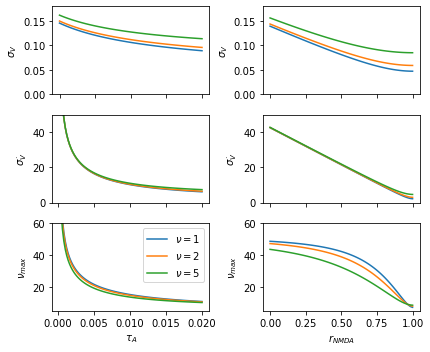

In [48]:
tau_arr = np.linspace(0,0.02,101)
r_arr = np.linspace(0,1,101)

fig,ax = plt.subplots(3,2,figsize=(6,5))

for j,x_arr in enumerate([tau_arr,r_arr]):
    for nu in [1,2,5]:
        
        if j:
            args = {'tau_A':0.001,'tau_G':0.03, 'tau_M':0.01, 'nu':1., 'nu_I':nu,'r':x_arr}
        else:
            args = {'tau_A':x_arr,'tau_G':0.03, 'tau_M':0.01, 'nu':1., 'nu_I':nu, 'r':0.}
        
        nu_max_arr = nu_max(**args)

        ax[0][j].plot(x_arr,np.sqrt(sigma_V(**args)))
        ax[1][j].plot(x_arr,np.sqrt(sigma_V_dot(**args)))    
        ax[2][j].plot(x_arr,nu_max_arr,'-',label=f'$\\nu={nu}$')
    
    plt.setp(ax[0][j],ylim=[0,0.18],xticklabels=[],ylabel='$\\sigma_V$')
    plt.setp(ax[1][j],ylim=[0,50],xticklabels=[],ylabel='$\\sigma_{\\dot{V}}$')
    plt.setp(ax[2][j],ylim=[5,60],ylabel='$\\nu_{max}$')
    if j==0:
        ax[2][j].legend()
    
plt.setp(ax[2][0],xlabel='$\\tau_A$')
plt.setp(ax[2][1],xlabel='$r_{NMDA}$')

plt.tight_layout()
plt.show()

In [49]:
def find_roots(nu_max,add_args,nu_mean):
    
    roots_r = np.zeros(len(nu_max))
    roots_tau = np.zeros(len(nu_max))
    for i,nu_m in enumerate(nu_max):
        
        r_tau = RootFinder(-0.05, 0.2, 0.01)
        root = r_tau.find(solve_nu_max, 'tau_A', (nu_m,{**add_args}|{'nu':nu_mean[i]}))
        root = [ro for ro in root if 0<ro<0.02]
        if len(root):
            roots_tau[i] = root[0]
        
        r_r = RootFinder(-1, 3, 0.1)
        root = r_r.find(solve_nu_max, 'r', (nu_m,{**add_args}|{'nu':nu_mean[i]}))
        root = [ro for ro in root if 0<ro<1]
        if len(root):
            roots_r[i] = root[0]
    
    return roots_r, roots_tau

<IPython.core.display.Javascript object>


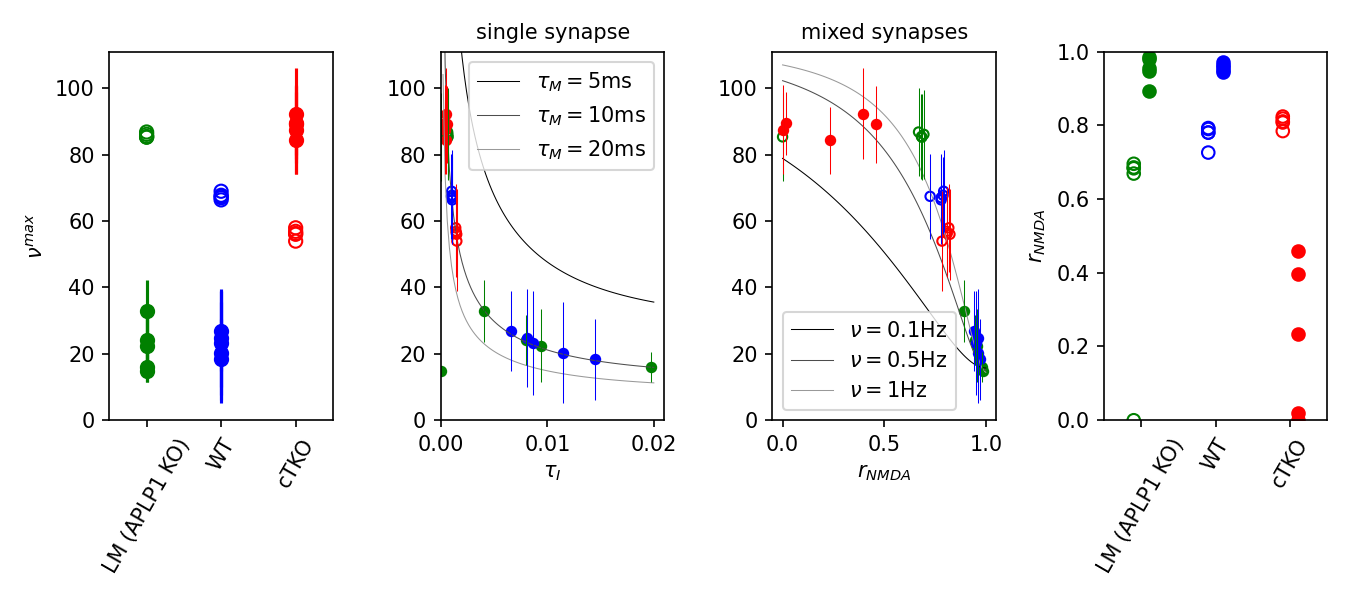

/tmp/ipykernel_16052/1137794663.py:21: RuntimeWarning: divide by zero encountered in true_divide
  (1./(tau_A * tau_M) * J**2 * nu / (tau_A + tau_M) * ( r_A**2/2 + (r_A*r_N * tau_A)/(tau_A + tau_N) ) + \
/tmp/ipykernel_16052/1137794663.py:27: RuntimeWarning: invalid value encountered in sqrt
  return 1./(2*math.pi) * np.sqrt(sigma_V_dot(**kwargs)/sigma_V(**kwargs))


nu_m: [85.24784337 86.81928248 86.11464559 85.45036373 85.34139611]
nu_mean (without): [2.06647561 2.01479323 2.45808918 2.05372657 0.00869665]
r: [0.95560068 0.94679542 0.98589079 0.97944006 0.89406239], tau: [0.00936139 0.00795073 0.         0.01972975 0.00402459]
nu_m: [67.01251921 67.76090493 66.36986517 68.97272518 67.43726656]
nu_mean (without): [1.58248815 1.89361855 1.5194748  2.14640431 0.91646755]
r: [0.96256492 0.97059475 0.95108157 0.94395636 0.95927194], tau: [0.01147406 0.0145167  0.00862871 0.00660095 0.0080586 ]
nu_m: [56.00895324 53.95108581 57.96332247 56.27233519 56.89790658]
nu_mean (without): [1.39951762 0.73868758 1.46530756 1.17482506 1.17629782]
r: [0.01916668 0.         0.3976743  0.45931706 0.23305772], tau: [0.00040578 0.00035852 0.00051074 0.00054973 0.00048919]


In [96]:
%matplotlib nbagg

col = ['g','b','r']

types_unq = np.unique(types)

add_args = {'nu':1.,'nu_I':2.,'tau_M':0.005,'tau_A':0.0004,'tau_G':0.02,'r':0.}

fig,ax = plt.subplots(1,4,figsize=(9,4))

tau_arr = np.linspace(0,0.02,101)
ax[1].plot(tau_arr,nu_max(**(add_args|{'tau_A':tau_arr,'tau_M':0.001})),color=[0,0,0],lw=0.5,label='$\\tau_M=5$ms')
ax[1].plot(tau_arr,nu_max(**(add_args|{'tau_A':tau_arr,'tau_M':0.005})),color=[0.3,0.3,0.3],lw=0.5,label='$\\tau_M=10$ms')
ax[1].plot(tau_arr,nu_max(**(add_args|{'tau_A':tau_arr,'tau_M':0.01})),color=[0.6,0.6,0.6],lw=0.5,label='$\\tau_M=20$ms')
    
r_arr = np.linspace(0,1,101)
ax[2].plot(r_arr,nu_max(**(add_args|{'r':r_arr,'nu':0.1})),color=[0,0,0],lw=0.5,label='$\\nu=0.1$Hz')
ax[2].plot(r_arr,nu_max(**(add_args|{'r':r_arr,'nu':0.5})),color=[0.3,0.3,0.3],lw=0.5,label='$\\nu=0.5$Hz')
ax[2].plot(r_arr,nu_max(**(add_args|{'r':r_arr,'nu':1.})),color=[0.6,0.6,0.6],lw=0.5,label='$\\nu=1$Hz')

r_res = []
r_res_silent = []

tau_res = []
tau_res_silent = []

for i,t in enumerate(types_unq):
    idx_type = types==t
    
    ### data without including silent neurons
    res = results
    
    gamma = res['gamma']['mean']
    delta = res['delta']['mean']
    nu_m = res['nu_max']['mean']
    
    print(f'nu_m: {nu_m[i,:]}')
    nu_mean = get_nu_bar(gamma=gamma[i,:],delta=delta[i,:],nu_max=nu_m[i,:])
    print(f'nu_mean (without): {nu_mean}')
    
    x_pos = np.array([i]*idx_type.sum()).astype('float')
    ax[0].scatter(x_pos,results['nu_max']['mean'][i,:],color=col[i],facecolor='none',label=t,s=40)
    
    roots_r, roots_tau = find_roots(res['nu_max']['mean'][i,:],add_args,nu_mean=np.squeeze(nu_mean))
    #print(f'r: {roots_r}, tau: {roots_tau}')
    
    ax[1].errorbar(roots_tau,res['nu_max']['mean'][i,:],res['nu_max']['std'][i,:],color=col[i],lw=0,elinewidth=0.5)
    ax[1].scatter(roots_tau,res['nu_max']['mean'][i,:],color=col[i],facecolor='none',s=20)
    
    ax[2].errorbar(roots_r,res['nu_max']['mean'][i,:],res['nu_max']['std'][i,:],color=col[i],lw=0,elinewidth=0.5)
    ax[2].scatter(roots_r,res['nu_max']['mean'][i,:],color=col[i],s=20,facecolor='none')
    
    ax[3].scatter(x_pos-0.1,roots_r,color=col[i],facecolor='none')
    
    #continue
    ### data including silent neurons
    res = results_silent
    
    gamma = res['gamma']['mean']
    delta = res['delta']['mean']
    nu_m = res['nu_max']['mean']
    nu_mean = get_nu_bar(gamma=gamma[i,:],delta=delta[i,:],nu_max=nu_m[i,:])
    #print(f'nu_mean (with silence): {nu_mean}')
    
    roots_r, roots_tau = find_roots(res['nu_max']['mean'][i,:],add_args,nu_mean=np.squeeze(nu_mean))
    print(f'r: {roots_r}, tau: {roots_tau}')
    ax[0].errorbar(x_pos,res['nu_max']['mean'][i,:],res['nu_max']['std'][i,:],color=col[i])
    ax[0].scatter(x_pos,res['nu_max']['mean'][i,:],color=col[i],label=t,s=40)
    
    ax[1].errorbar(roots_tau,res['nu_max']['mean'][i,:],res['nu_max']['std'][i,:],color=col[i],lw=0,elinewidth=0.5)
    ax[1].scatter(roots_tau,res['nu_max']['mean'][i,:],color=col[i],s=20)
    #ax[1].errorbar(get_tau_I(res['nu_max']['mean'][idx_type,0,0],tau_m=tau_m),res['nu_max']['mean'][idx_type,0,0],res['nu_max']['std'][idx_type,0,0],color=col[i],lw=0,elinewidth=0.5)
    #ax[1].scatter(get_tau_I(res['nu_max']['mean'][idx_type],tau_m=tau_m),res['nu_max']['mean'][idx_type],color=col[i],s=20)
    
    ax[2].errorbar(roots_r,res['nu_max']['mean'][i,:],res['nu_max']['std'][i,:],color=col[i],lw=0,elinewidth=0.5)
    ax[2].scatter(roots_r,res['nu_max']['mean'][i,:],color=col[i],s=20)
    
    ax[3].scatter(x_pos+0.1,roots_r,color=col[i])
    
plt.setp(ax[0],xlim=[-0.5,2.5],ylim=[0,ax[0].get_ylim()[1]],
         ylabel='$\\nu^{max}$',xticks=range(3),xticklabels=types_unq)
plt.setp(ax[1],xlim=[0,ax[1].get_xlim()[1]],ylim=[0,ax[0].get_ylim()[1]],xlabel='$\\tau_I$')
plt.setp(ax[2],ylim=[0,ax[0].get_ylim()[1]],xlabel='$r_{NMDA}$')
plt.setp(ax[3],xlim=[-0.5,2.5],ylim=[0,1],
         ylabel='$r_{NMDA}$',xticks=range(3),xticklabels=types_unq)
plt.setp(ax[0].get_xticklabels(), rotation=60)
plt.setp(ax[3].get_xticklabels(), rotation=60)

ax[1].legend()
ax[1].set_title('single synapse',fontsize=10)
ax[2].set_title('mixed synapses',fontsize=10)
ax[2].legend()
plt.tight_layout()
plt.show()

In [166]:
np.squeeze(results['nu_max']['mean'])

array([39.73531779, 36.58446298, 39.22070066, 43.41605063, 42.34262525,
       46.35963216, 42.68094176, 39.27246018, 35.75247859, 27.59935802,
       39.95362984, 35.79551386, 36.930396  ])

In [92]:
nu_max(tau_M=0.01,r=0.8)

14.71536694229676

<IPython.core.display.Javascript object>


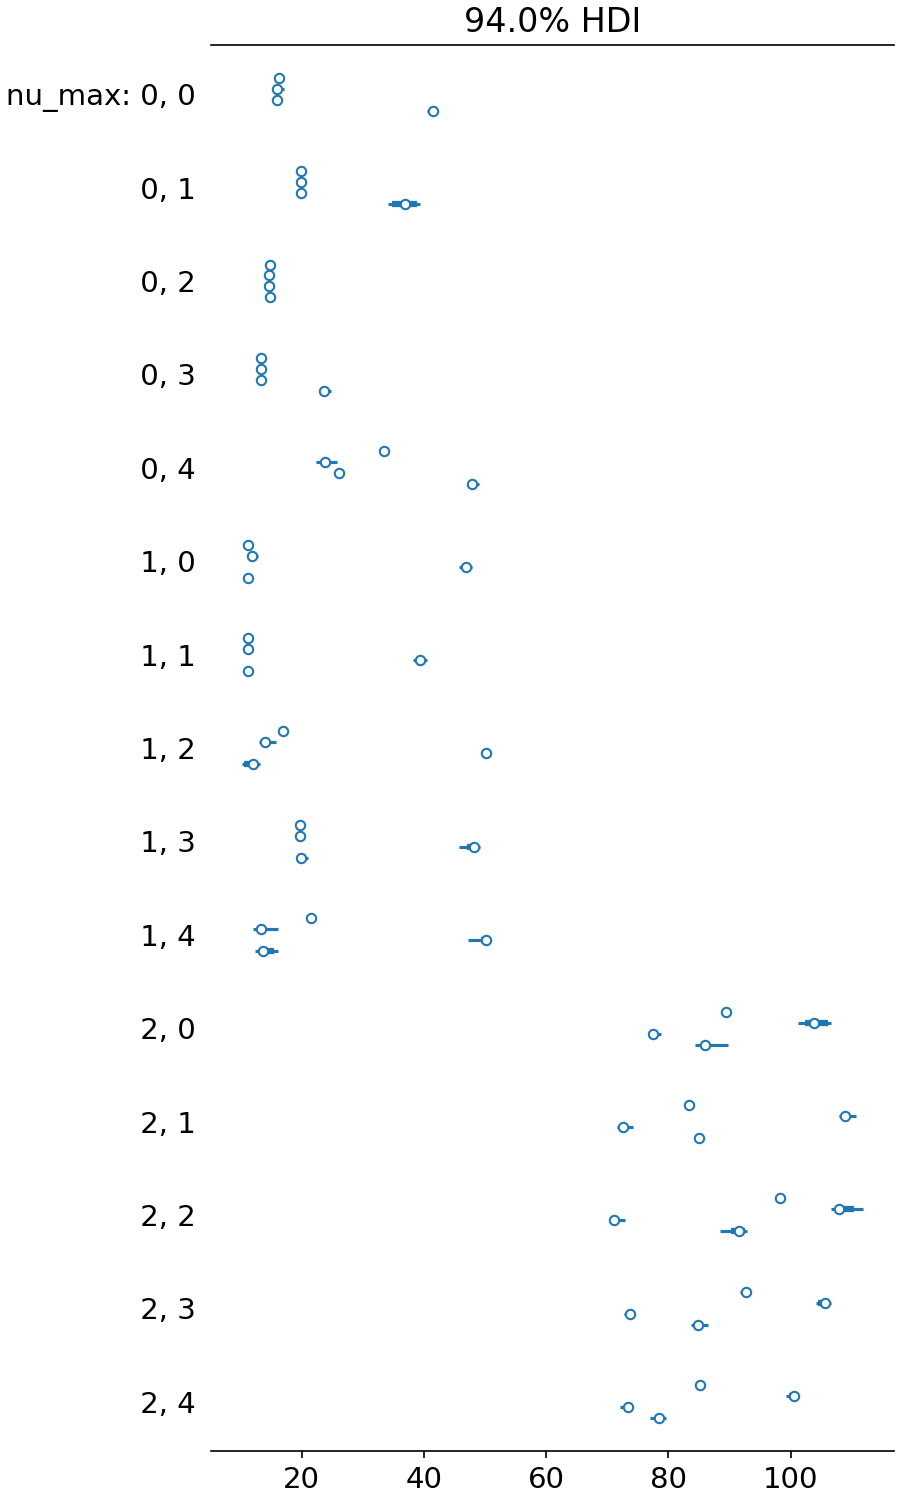

<IPython.core.display.Javascript object>


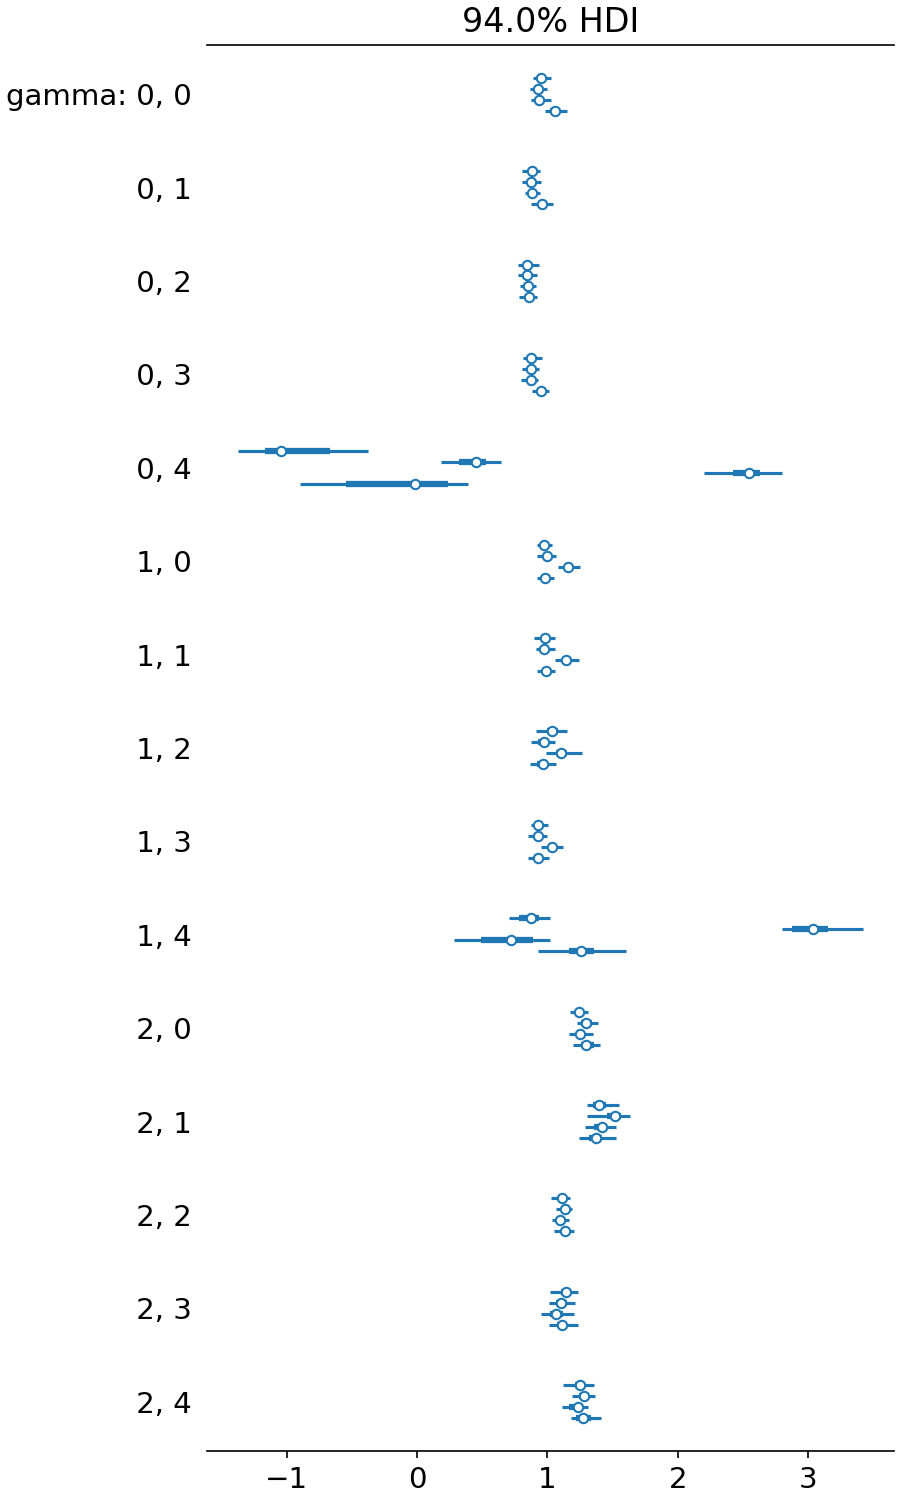

<IPython.core.display.Javascript object>


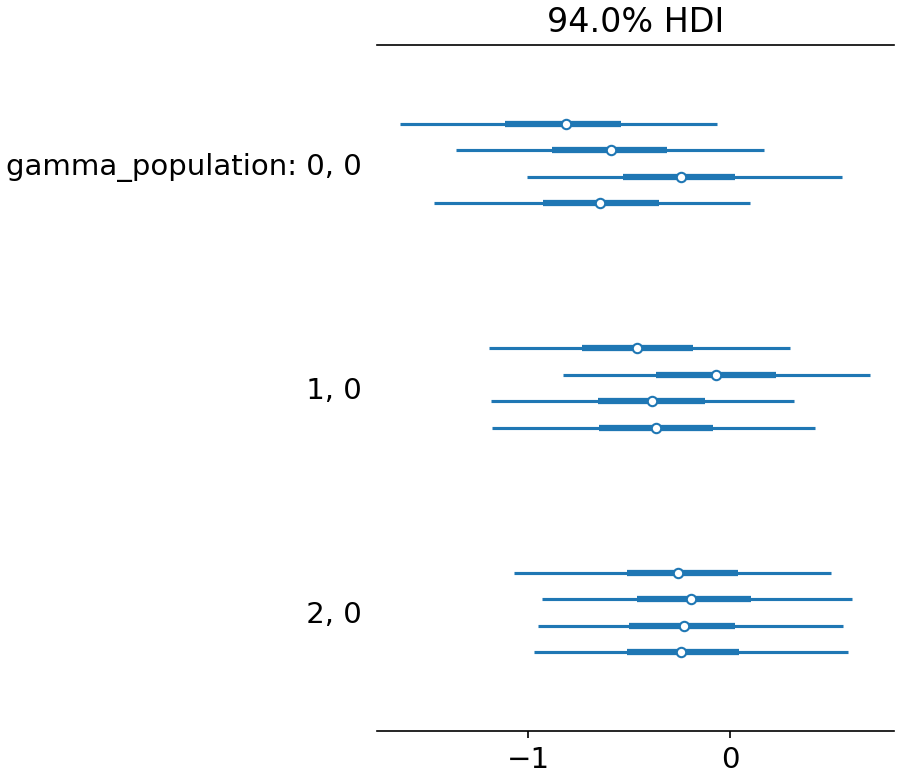

<IPython.core.display.Javascript object>


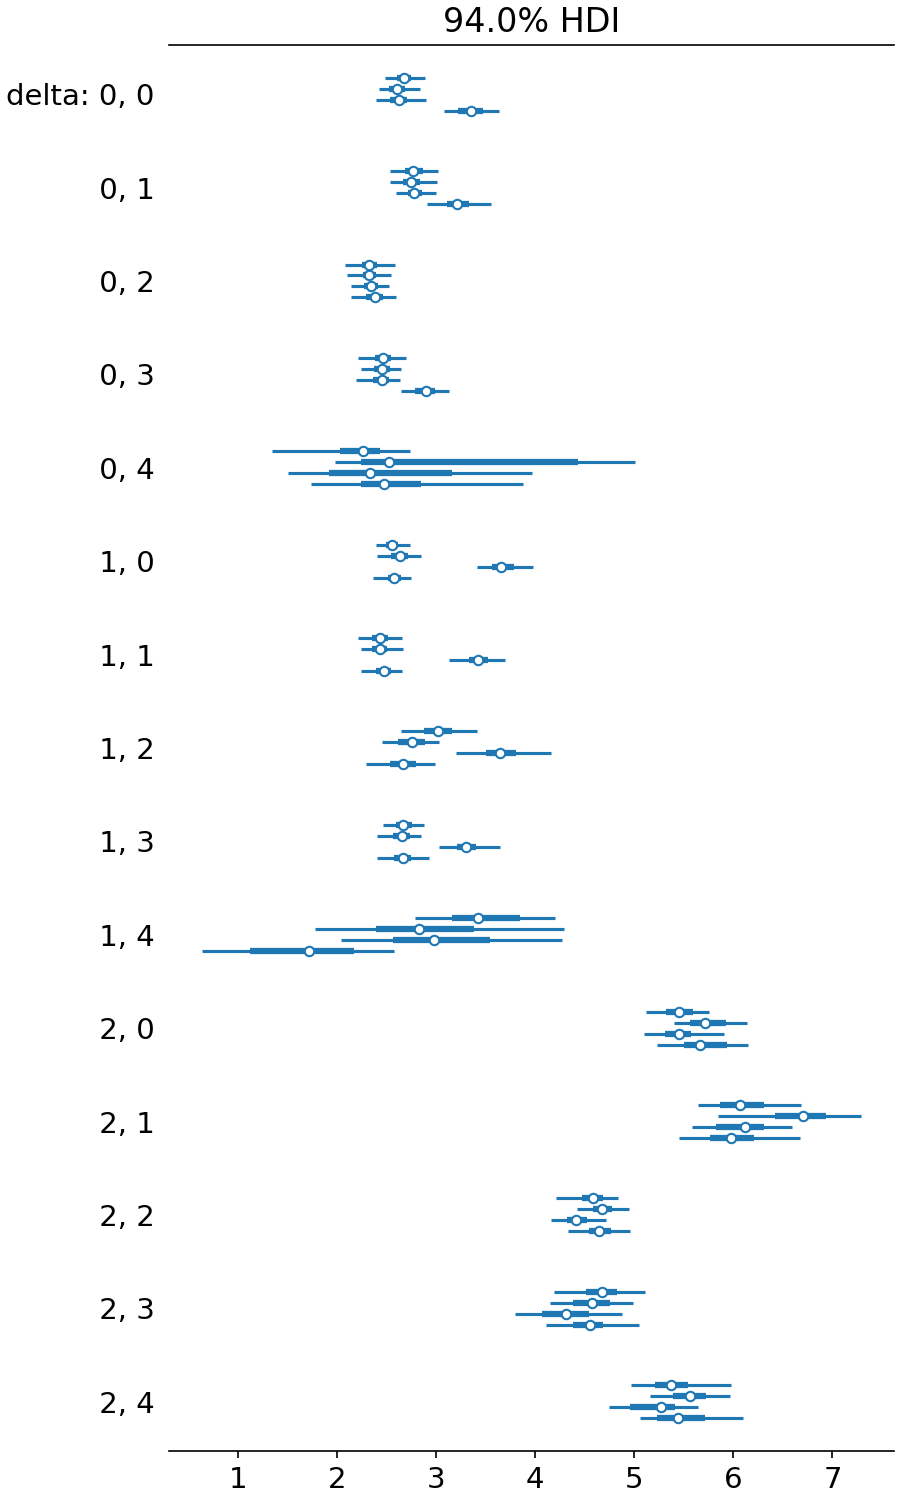

<IPython.core.display.Javascript object>


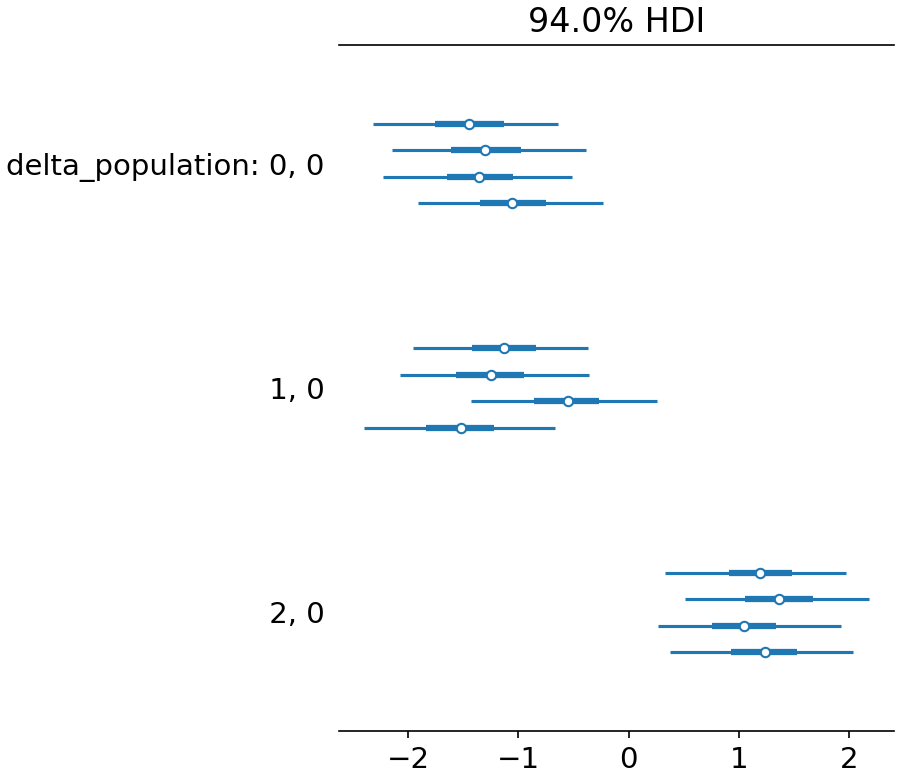

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

In [88]:
t = I_silent.trace
az.plot_forest(t,var_names=['nu_max'])
az.plot_forest(t,var_names=['gamma'])
az.plot_forest(t,var_names=['gamma_'], filter_vars='regex')
az.plot_forest(t,var_names=['delta'])
az.plot_forest(t,var_names=['delta_'], filter_vars='regex')


<IPython.core.display.Javascript object>


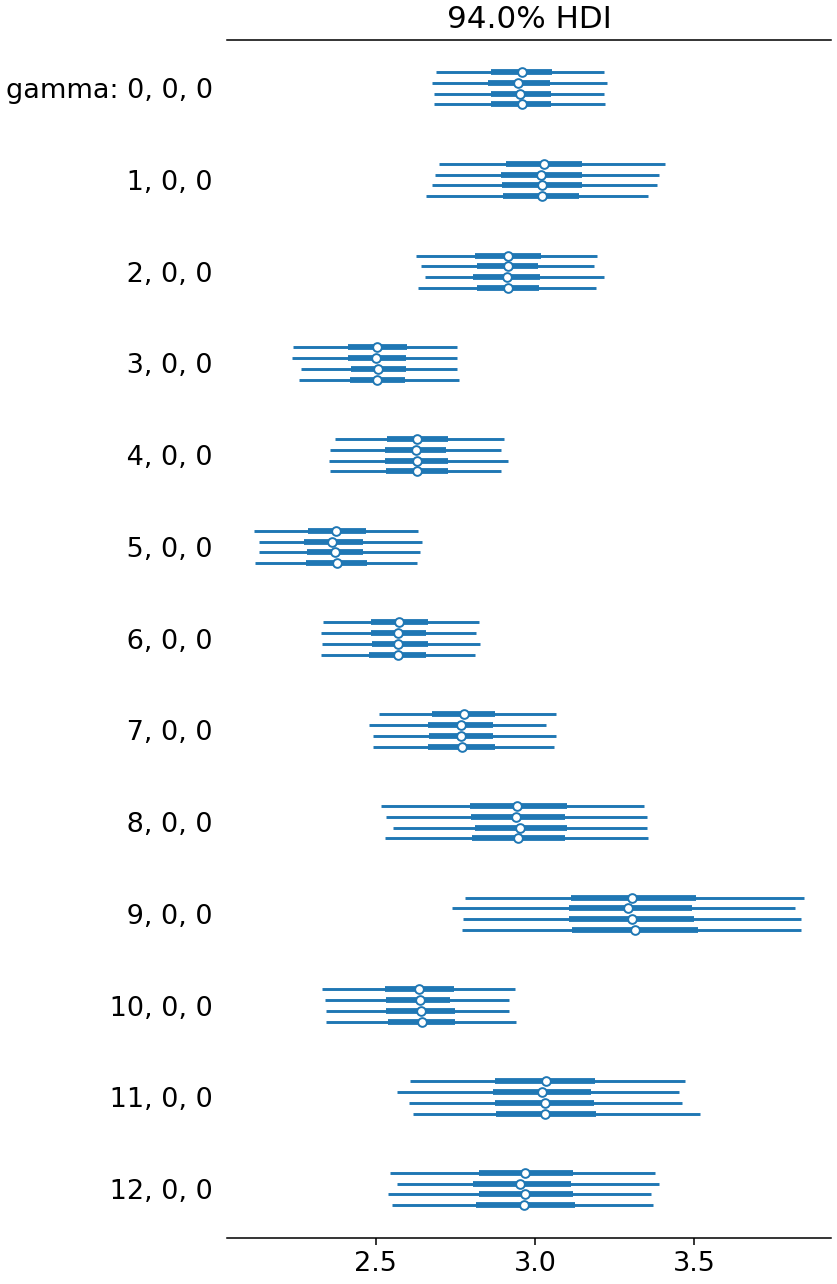

<IPython.core.display.Javascript object>


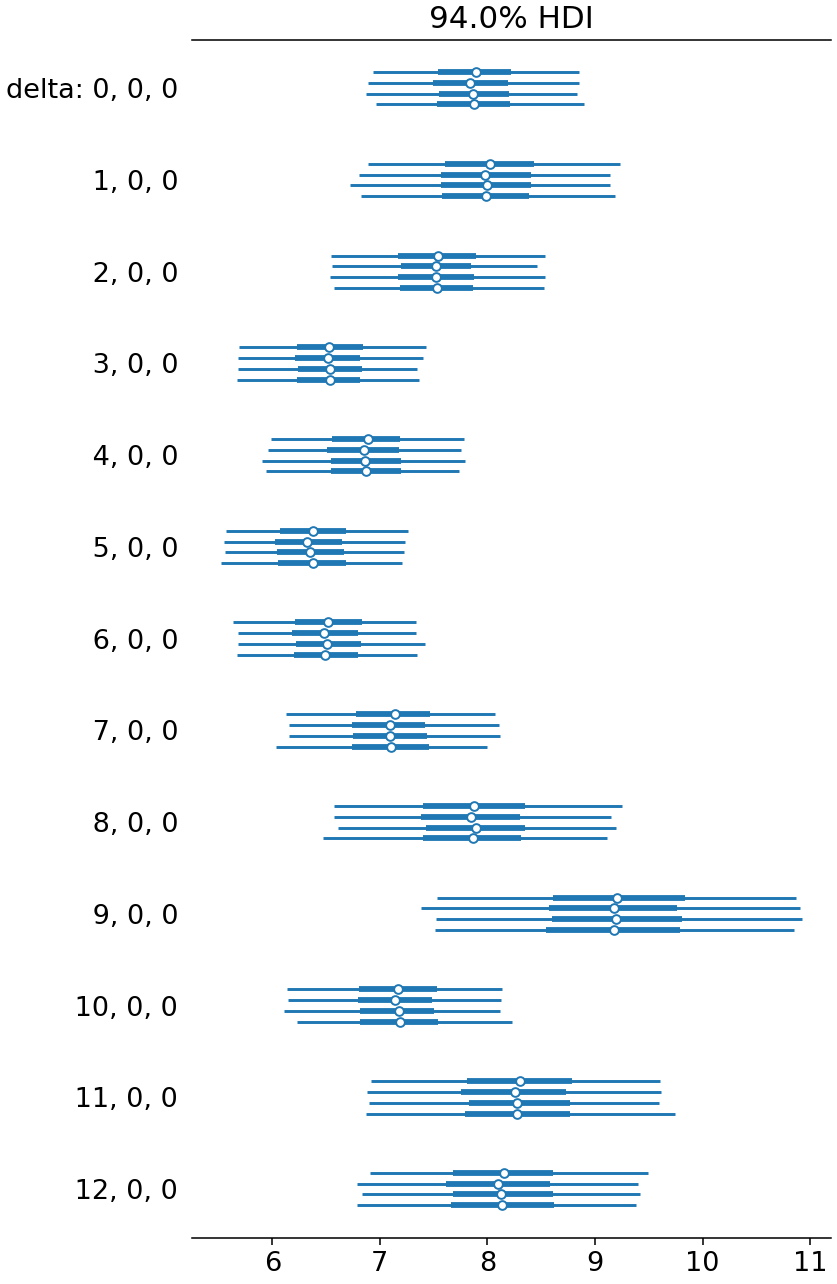

<IPython.core.display.Javascript object>


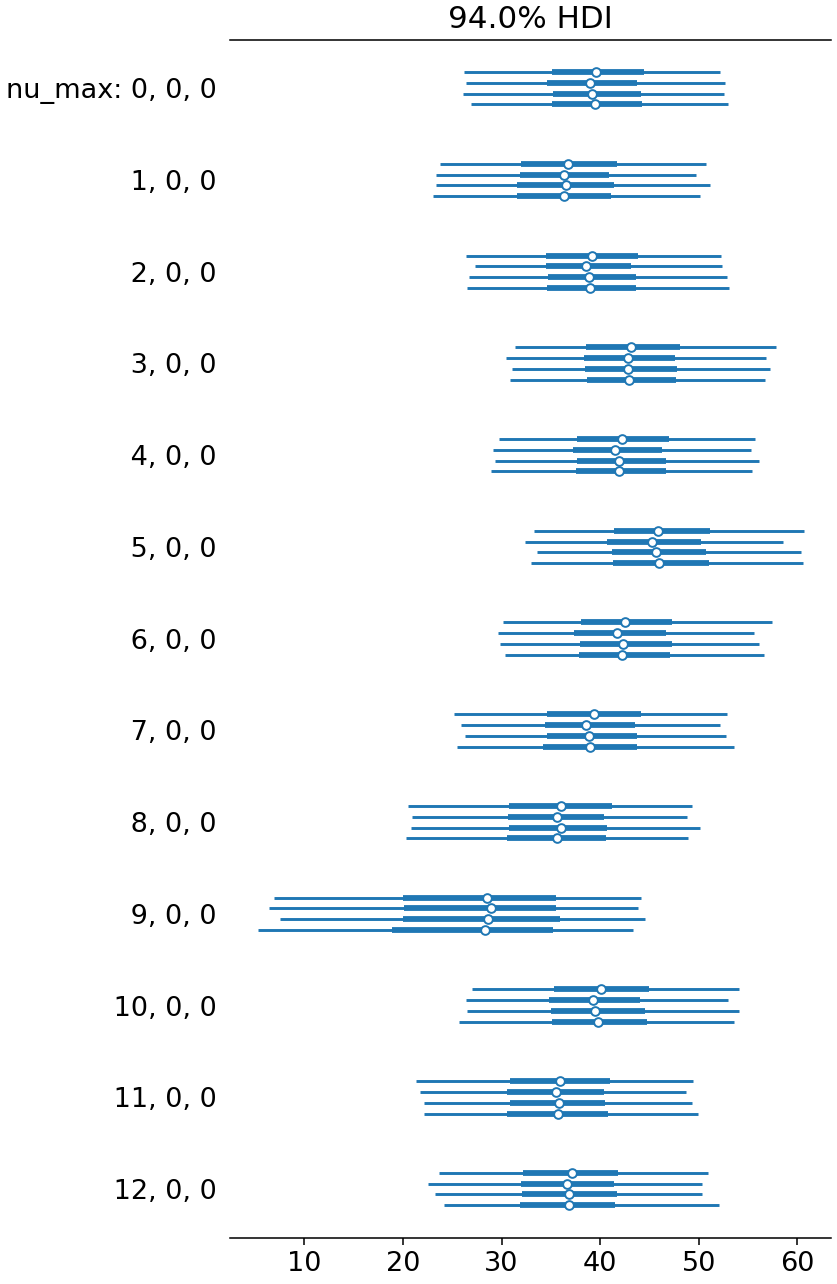

array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

In [34]:
az.plot_forest(t,var_names=['gamma'])
az.plot_forest(t,var_names=['delta'])
az.plot_forest(t,var_names=['nu_max'])

In [37]:
delta_range = [0,10]
gamma_range = [0,4]
chi = create_phaseSpace(steps=101,gamma_range=gamma_range,delta_range=delta_range,nu_max=results['nu_max']['mean'][0,0])

<IPython.core.display.Javascript object>


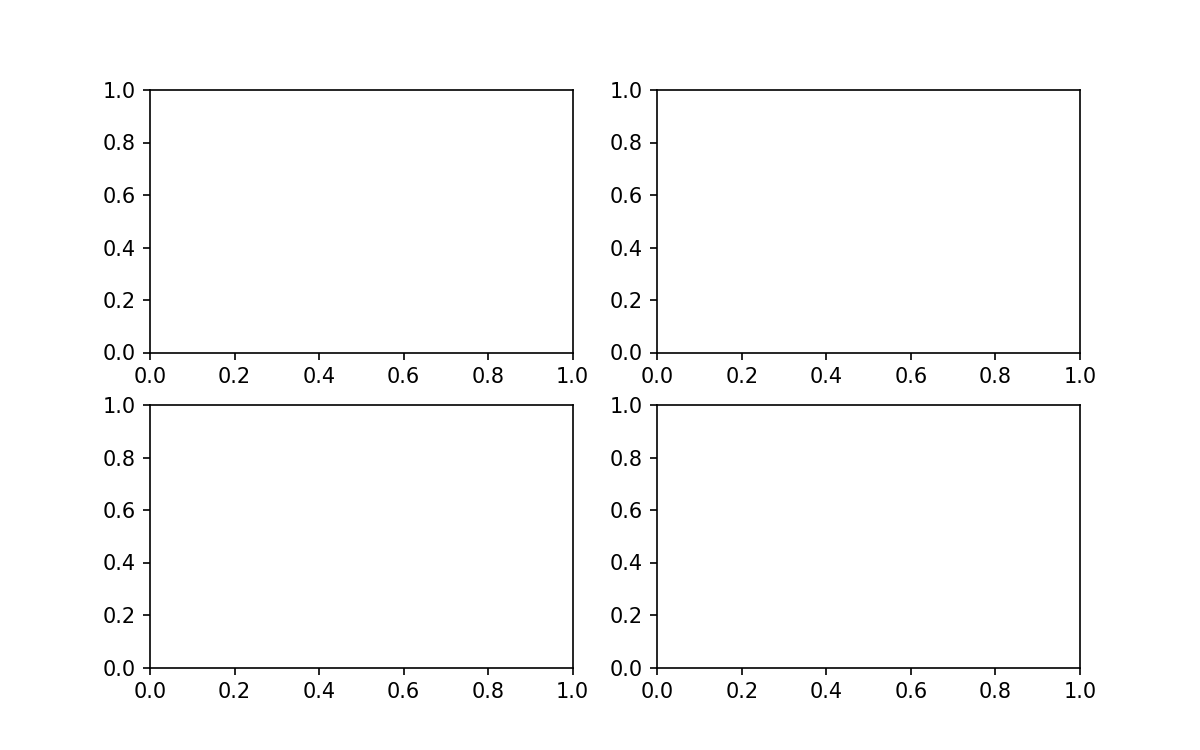

NameError: name 'get_tau_I' is not defined

In [91]:
from 

def plot_results(ax,I,results,title,**kwargs):
    
    types = I.data_df.columns.get_level_values(level=0)
    types_unq = np.unique(types)
    
    gamma = results['gamma']['mean']
    delta = results['delta']['mean']
    nu_max = results['nu_max']['mean']
    
    tau_m = 0.01
    tau_I = get_tau_I(nu_max,tau_m=tau_m)
    #print(f'$\displaystyle\\tau_I = {tau_I}$')
    nu_mean = get_nu_bar(gamma=gamma,delta=delta,nu_max=nu_max)

    q = nu_max**2 * gamma / np.sqrt(gamma**2 + 2) * np.exp(-delta**2 / (2+gamma**2))
    J_0 = -1 * tau_m
    alpha_0 = np.sqrt(J_0**2 * ( nu_mean/ (2 * gamma**2 * (tau_I + tau_m)) - q))
    
    #ax = ax if mP._num_clusters>1 else [ax]
    
    if len(types_unq)>2:
#        col = np.array([[0,0,1],[0,1,0],[1,0,0]])
        col = ['b','g','r']
    else:
        col = np.array([[0,0,1],[1,0,0]])
    
    addLabel = False
    for c in range(1):#mP._num_clusters):
        ax[c][0].axhline(1,color='k',linestyle='--')
        for i,t in enumerate(types_unq):
            for l in range(1):#mP._num_layers):
                #co = col[i]*(l+3)/(mP._num_layers+2)
                co = col[i]
                idx = types == t
                if not ('label' in kwargs) or addLabel:
                    addLabel = True
                    kwargs['label'] = f'{types_unq[i]}'
                    if mP._num_layers>1:
                        kwargs['label'] += f' (L{l})'
                    if mP._num_clusters>1:
                        kwargs['label'] += f' c{c}'
                
                ax[c][0].errorbar(delta[idx,l,c],gamma[idx,l,c],results['gamma']['std'][idx,l,c],results['delta']['std'][idx,l,c],color=co,lw=0,elinewidth=0.5)
                ax[c][0].scatter(delta[idx,l,c],gamma[idx,l,c],s=1+30*np.sqrt(results['N'][idx,l,c]/np.max(results['N'][...])),color=co,**kwargs)
                ax[c][1].scatter(np.squeeze(nu_mean[idx,l,c]),np.squeeze(alpha_0[idx,l,c]),s=1+30*np.sqrt(results['N'][idx,l,c]/np.max(results['N'][...])),color=co,**kwargs)
                ax[1][1].plot([0,2.5],[0,2.5],'k--')
                ax[1][1].scatter(np.squeeze(results['fr'][idx,...]),np.squeeze(nu_mean[idx,l,c]),color=co,**kwargs)
        
    #plt.suptitle(title)
    
fig,ax = plt.subplots(2,2,figsize=(8,5*1))#mP._num_clusters))
plot_results(ax,I,results,'without silence',facecolor='none',label='_nolegend_')
plot_results(ax,I_silent,results_silent,'with silence')
ax[1][0].remove()

for c in range(1):#mP._num_clusters):
    plt.setp(ax[c][1],xlim=[0,3],ylim=[0,0.1],
        xlabel='$\\bar{\\nu}$',ylabel='$\\alpha_0$')
    plt.setp(ax[c][0],xlim=[0,12],ylim=[0,4],
        xlabel='$\\delta$',ylabel='$\\gamma$')
plt.setp(ax[1][1],xlabel='naive $\\bar{\\nu}$',ylabel='inferred $\\bar{\\nu}$')
ax[0][0].legend()
plt.tight_layout()
plt.show()

#plot_results(mP_Ca,results_Ca,'Ca imaging')

In [41]:
#with model:
stat_summary = az.summary(trace, round_to=2)
stat_summary_silent = az.summary(trace_silent, round_to=2)

<IPython.core.display.Javascript object>


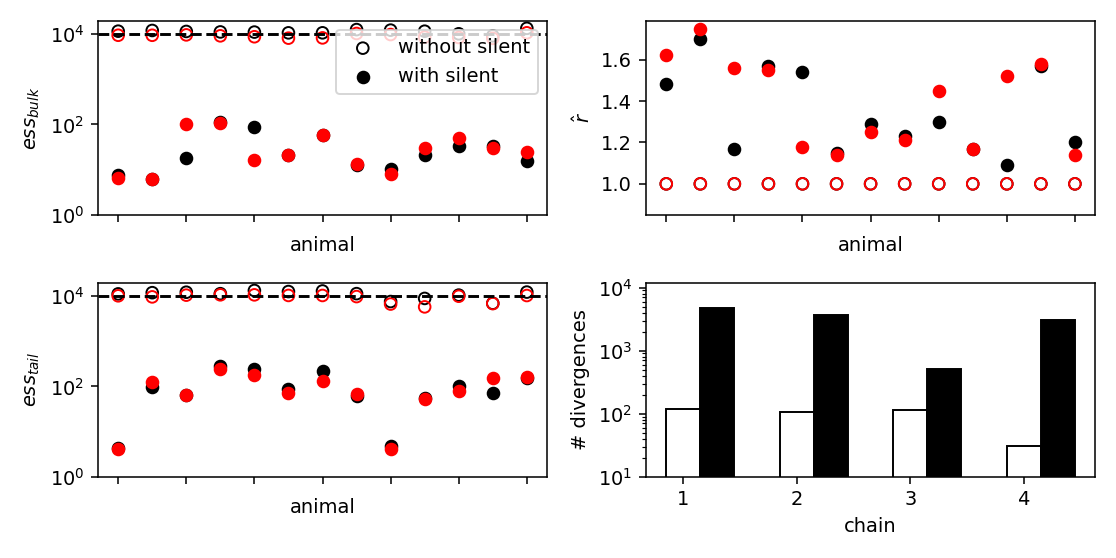

[0. 1. 2. 3.]
[0.3 1.3 2.3 3.3]


In [43]:
%matplotlib nbagg

fig,ax = plt.subplots(2,2,figsize=(8,4))
col = ['k','r']
width = 0.3

ax[0][0].axhline(10000,linestyle='--',color='k')
ax[1][0].axhline(10000,linestyle='--',color='k')

add_args = [{'facecolor':'none'},{}]
for j,summ in enumerate([stat_summary,stat_summary_silent]): 
    
    for i,key in enumerate(['^gamma[^_]','^delta[^_]']):
        idxs = summ.index.str.contains(key)
        #print(summ.index[idxs])
        ax[0][0].scatter(range(idxs.sum()),summ.loc[idxs]['ess_bulk'],color=col[i],**add_args[j])
        ax[1][0].scatter(range(idxs.sum()),summ.loc[idxs]['ess_tail'],color=col[i],**add_args[j])
        #print(summ.loc[idxs]['r_hat'])
        ax[0][1].scatter(range(idxs.sum()),summ.loc[idxs]['r_hat'],color=col[i],**add_args[j])
    
    divs = traces[j]['sample_stats']['diverging'].sum(axis=1)
    print(np.arange(len(divs))+j*width)
    ax[1][1].bar(np.arange(len(divs))+j*width,divs,width,color='k',**add_args[j],edgecolor='k')
    
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
ax[1][1].set_yscale('log')

ax[0][0].scatter(np.NaN,0,color='k',facecolor='none',label='without silent')
ax[0][0].scatter(np.NaN,0,color='k',label='with silent')

ax[0][0].legend(loc='upper right')

plt.setp(ax[0][0],ylim=[1,ax[0][0].get_ylim()[1]],xticklabels=[],ylabel='$ess_{bulk}$',xlabel='animal')
plt.setp(ax[1][0],ylim=[1,ax[1][0].get_ylim()[1]],xticklabels=[],ylabel='$ess_{tail}$',xlabel='animal')
plt.setp(ax[0][1],ylim=[0.85,ax[0][1].get_ylim()[1]],xticklabels=[],ylabel='$\\hat{r}$',xlabel='animal')
plt.setp(ax[1][1],ylim=[10,12000],xlabel='chain',xticks=range(4),xticklabels=range(1,5),ylabel='# divergences')
plt.tight_layout()
plt.show()

In [388]:
trace_silent['sample_stats']['diverging'].sum(axis=1)

<xarray.DataArray 'diverging' (chain: 4)>
array([4668, 3668,  519, 3088])
Coordinates:
  * chain    (chain) int64 0 1 2 3

In [10]:
display(az.summary(trace_silent, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"delta_gamma_layer[0,0,0]",-0.22,0.58,-0.97,0.61,0.28,0.21,5.37,44.82,2.09
"gamma[0,0,0]",1.04,0.03,1.00,1.09,0.01,0.01,6.87,31.74,1.58
"gamma[1,0,0]",1.07,0.08,0.93,1.18,0.04,0.03,5.18,14.96,2.22
"gamma[2,0,0]",1.08,0.05,1.01,1.17,0.02,0.02,5.44,13.60,2.03
"gamma[3,0,0]",1.03,0.03,0.99,1.07,0.01,0.01,5.41,11.25,2.13
"gamma[4,0,0]",0.99,0.03,0.92,1.04,0.02,0.01,5.29,11.37,2.12
"gamma[5,0,0]",0.94,0.03,0.89,0.99,0.01,0.01,5.26,38.64,2.14
"gamma[6,0,0]",0.90,0.02,0.87,0.94,0.01,0.01,8.17,17.36,1.46
"gamma[7,0,0]",0.92,0.03,0.86,0.98,0.01,0.01,8.36,24.82,1.44
"gamma[8,0,0]",1.25,0.02,1.20,1.28,0.00,0.00,22.52,16.27,1.33


N total = 123, N silent = 48, N low = 6
N total = 171, N silent = 48, N low = 6


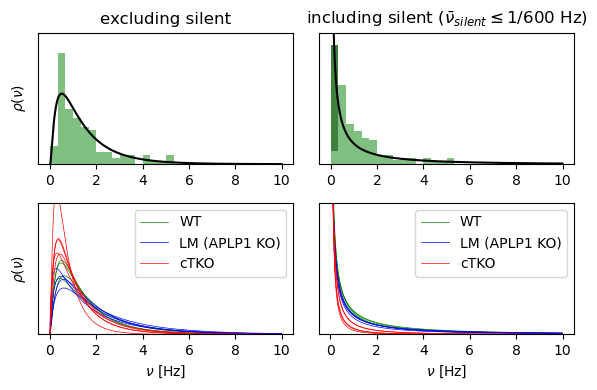

In [309]:
#res = results_silent
steps = 31
dH = 10/(steps-1)

fig,ax = plt.subplots(2,2,figsize=(6,4))

mPs = [mP,mP_withSilent]

ii = 1

N_silent = (mP.spikes_raw[ii,0,...]==0).sum() 
N_low = ((mP.spikes_raw[ii,0,...]>0) & (mP.spikes_raw[ii,0,...]<dH)).sum()
    
for j,res in enumerate([results,results_silent]):
    gamma = np.squeeze(res['gamma']['mean'])
    delta = np.squeeze(res['delta']['mean'])
    nu_max = np.squeeze(res['nu_max']['mean'])
    
    
    nu_arr = np.linspace(0,10,1001)
    
    hist_data = mPs[j].spikes_raw[ii,0,~np.isnan(mPs[j].spikes_raw[ii,0,...])]
    hist_data = hist_data[hist_data>0]
    
    N_total = len(hist_data)
    print(f'N total = {N_total}, N silent = {N_silent}, N low = {N_low}')
    
    if j>0:
        ax[0][j].bar(0,N_silent/N_total*1/dH,bottom=N_low/N_total*1/dH,width=dH,align='edge',facecolor='grey')
    
    ax[0][j].hist(hist_data,np.linspace(0,10,steps),density=True,facecolor='g',alpha=0.5)
    ax[0][j].plot(nu_arr,p_nu(nu_arr,gamma[ii],delta[ii],nu_max[ii]),'-',color='k')

    plt.setp(ax[0][j],ylim=[0,1.05],yticks=[])
    
    #plot added silent ones as separate bar
    ax[0][0].set_title('excluding silent')
    ax[0][1].set_title('including silent ($\\bar{\\nu}_{silent}\leq1/600$ Hz)')
        
    for i,t in enumerate(mP.types):

        co = col[i]
        idx = mP.type == i
    
        hasLabel = False
        for g,d,n in zip(gamma[idx],delta[idx],nu_max[idx]):
            
            ax[1][j].plot(nu_arr,p_nu(nu_arr,g,d,n),'-',color=col[i],lw=0.5,label=t if not hasLabel else '_nolegend_')
            hasLabel = True

    plt.setp(ax[1][j],ylim=[0,1],yticks=[],xlabel='$\\nu$ [Hz]')
    ax[1][j].legend()
    
for j in range(2):
    plt.setp(ax[j][0],ylabel='$\\rho(\\nu)$')

plt.tight_layout()
plt.show()

In [250]:
7/279*30/10

0.07526881720430108

In [19]:
mP_Ca.spikes_raw.shape
firingrate = np.nanmean(mP_Ca.spikes_raw,axis=(3,))
plt.figure(figsize=(4,3))
plt.scatter(firingrate[:,:,0],firingrate[:,:,1],s=results_Ca['N'][:,:,0])
plt.setp(plt.gca(),xlabel='exc. [Hz]',ylabel='inh. [Hz]')
plt.plot([0,5],[0,5],'k--')
plt.show()

/tmp/ipykernel_130597/216928880.py:2: RuntimeWarning:

Mean of empty slice



NameError: name 'results_Ca' is not defined

<Figure size 400x300 with 0 Axes>

In [132]:
### ISSUES ###
#plots are not fitting to silent neurons
# this currently implements an excitatory population, only (without inhib or anything else...)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#def show_results(mP,trace,results):
res = results
mP_ = mP
t = trace

#res = results_silent
#mP_ = mP_withSilent
#t = trace_silent
l = 0
c = 0

plt.ion()
steps=101

nu_max = np.squeeze(res['nu_max']['mean'][l,c])
fig = make_subplots(rows=2, cols=1)

cols = ['rgb(0,0,155)','rgb(155,0,0)','rgb(0,155,0)']
col_array = [cols[idx] for idx in mP_.type]

fig.add_trace(
    go.Heatmap(z=chi,
              x=np.linspace(*delta_range,steps),
              y=np.linspace(*gamma_range,steps),
              zmin=0,zmax=3.5,
              colorscale='YlOrRd',
              #labels={'x':'$\delta$','y':'$\gamma$','color':'$\chi$'}
              ),
    row=1,col=1
)

#delta_x, gamma_y = np.meshgrid(np.linspace(*delta_range,steps), np.linspace(*gamma_range,steps), indexing='xy')
#fig.add_trace(
#    go.Heatmap(z=gamma_y,
#              x=np.linspace(*delta_range,steps),
#              y=np.linspace(*gamma_range,steps),
#              zmin=0,zmax=3.5,
#              colorscale='YlOrRd',
#              #labels={'x':'$\delta$','y':'$\gamma$','color':'$\chi$'}
#              ),
#    row=1,col=1
#)

fig.add_trace(
    go.Scatter(x=res['delta']['mean'][...,l,c], y=res['gamma']['mean'][...,l,c],
        error_x=dict(
            type='data', # value of error bar given in data coordinates
            array=res['delta']['std'][...,l,c],
            visible=True),
        error_y=dict(
            type='data', # value of error bar given in data coordinates
            array=res['gamma']['std'][...,l,c],
            visible=True),
        mode='markers',
        marker={'size':np.sqrt(res['N'][...,l,c])+5, 'color': col_array},
        name='empirical data',
        legendgroup='1'),
    row=1,col=1,
)
scatter = fig.data[1]

#delta = res['delta']['mean'][0,1,0]
#gamma = res['gamma']['mean'][0,1,0]
#print(delta)
#print(res['delta']['mean'])

hist_data = mP_.spikes_raw[0,~np.isnan(mP_.spikes_raw[0,...])]
hist_data = hist_data[hist_data>0]

steps_distr = 10001
x_arr = np.linspace(1/steps_distr,nu_max,steps_distr)

for ll in range(mP_._num_layers):
    
    l_col = (ll+2)/(mP_._num_layers+1)
    col_line = f'rgb({int(l_col*255)},0,0)'
    col_hist = f'rgb(0,{int(l_col*255)},0)'
    fig.add_trace(
        go.Line(x=x_arr,y=p_nu(x_arr,res['gamma']['mean'][0,ll,c],res['delta']['mean'][0,ll,c],nu_max),
            name='distribution',
            legendgroup='2',
            line=dict(color=col_line),
           ),
        row=2,col=1
    )

    fig.add_trace(
        go.Histogram(x=hist_data, 
                    histnorm='probability',
                    xbins=dict(
                        start=-0.5,
                        end=10.5,
                        size=0.5
                    ),
             name='empirical',
             legendgroup='2',
             marker_color=col_hist
        ),
        row=2,col=1
    )

fig.update_xaxes(range=[-0.5, 10.5],row=2,col=1)
fig.update_yaxes(range=[0, 1.],row=2,col=1)


global prev_idx
prev_idx = None

#def update_point(trace, points, selector):
def update_point(idx):
    #print(idx)
    col = list(scatter.marker.color)
    global prev_idx
    if prev_idx:
        col[prev_idx] = col_array[prev_idx]

    #if len(points.point_inds):
    if not idx==None:
        #idx = points.point_inds[0]
        #for i in points.point_inds:
        col[idx] = '#bae2be'
        with fig.batch_update():
            scatter.marker.color = col
        
        for ll in range(mP_._num_layers):
            
            #print(f'gamma: {res["gamma"]["mean"][idx,l,0]}\n \
            #    delta: {res["delta"]["mean"][idx,l,0]} \n \
            #    nu_max: {nu_max}')
            print(idx,ll,c)
            fig.data[2+ll*2].update(y=p_nu(x_arr,res['gamma']['mean'][idx,ll,c],res['delta']['mean'][idx,ll,c],res['nu_max']['mean'][ll,c])*0.5)
            #idx = points.point_inds[0]
            prev_idx = idx

            hist_data = mP_.spikes_raw[idx,ll,~np.isnan(mP_.spikes_raw[idx,ll,...])]
            hist_data = hist_data[hist_data>0]
            #print(hist_data)

            fig.data[3+ll*2].update(x=hist_data)

#    nu_peak = get_nu_peak(gamma,delta,nu_max)
#    ax[1].set_title("peak @ {:.2f}Hz, chi: {:.2f}".format(nu_peak,chi))
#    mean_val = ax[1].vlines(get_nu_bar(gamma,delta,nu_max),0,5)
#    peak_val = ax[1].vlines(get_nu_peak(gamma,delta,nu_max),0,5,color='r')

    fig.show()

#fig = go.FigureWidget(fig)
#scatter = fig.data[1]
#scatter.on_click(update_point)

fig.update_layout(
    height=600, 
    width=600, 
    #title_text="Empirical data of firing rate distributions",
    legend_tracegroupgap = 360,
    #coloraxis_colorbar_x=-0.15,
)
#fig.update_layout(coloraxis_colorbar_x=-0.5)
print(fig.data[0].colorbar)
fig.data[0].colorbar.x=0.05
fig.data[0].colorbar.y=0.9
fig.data[0].colorbar.len=0.3
fig.data[0].colorbar.title='$\chi$'

#fig
idx_widget = widgets.IntSlider(0,min=0,max=mP._num_animals-1,step=1,orientation='horizontal',description=r'i')
widgets.interactive(update_point,idx=idx_widget)


heatmap.ColorBar()


interactive(children=(IntSlider(value=0, description='i', max=12), Output()), _dom_classes=('widget-interact',…

In [31]:
def plot_gammaDelta(ax,mP,results):
    #fig,ax = plt.subplots(1,mP._num_clusters,figsize=(12,6))
    try:
        ax[0]
    except:
        ax = [ax]
    
    print('clusters:',mP._num_clusters)
    print(ax)
    for c in range(mP._num_clusters):
        print(c)
        if c>0:
            continue
        for i in range(mP._num_layers):
            for idx,t in enumerate(mP.types):
                idxs = mP.type==idx
                p_label = mP.types[idx]
                #print(idxs)
                #f'layer {i}'
                ax[c].errorbar(results['delta']['mean'][idxs,i,c],results['gamma']['mean'][idxs,i,c],results['delta']['std'][idx,i,c],results['gamma']['std'][idxs,i,c],'o',ms=1,lw=0.5,label=p_label)
                ax[c].scatter(results['delta']['mean'][idxs,i,c],results['gamma']['mean'][idxs,i,c],s=1+2*results['N'][idxs,i,c])
                ax[c].legend()
        
        #ax[c].set_xlabel(r'$\displaystyle \delta$')
        plt.setp(ax[c], xlabel=r"$\displaystyle \delta$", ylabel=r'$\displaystyle \gamma$',
                xlim=[0,12],ylim=[0,4.5])
fig,ax = plt.subplots(1,3,figsize=(15,6))
plot_gammaDelta(ax[0],mP,results)
plot_gammaDelta(ax[1],mP_withSilent,results_silent)
plot_gammaDelta(ax[2],mP_Ca,results_Ca)

clusters: 1
[<AxesSubplot:>]
0
clusters: 1
[<AxesSubplot:>]
0
clusters: 2
[<AxesSubplot:>]
0
1


ValueError: 
\displaystyle \delta
^
Unknown symbol: \displaystyle, found '\'  (at char 0), (line:1, col:1)

<Figure size 1500x600 with 3 Axes>

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(N[:,0,0],N[:,0,1],'o',color=[0,0,0.2],label='L1')
ax.plot(N[:,1,0],N[:,1,1],'o',color=[0,0,1],label='L2')
ax.plot(N[:,2,0],N[:,2,1],'o',color=[0.7,0.7,1],label='L3')
plt.setp(ax,xlabel='excitatory',ylabel='inhibitory')

ax.legend()
plt.show()

In [17]:
df = pd.DataFrame(columns=['animal_idx','layer_idx','cluster_idx','gamma','gamma_std','delta','delta_std'])
#df['animal_idx'] = range(mP._num_animals)
for animal_idx in range(mP._num_animals): 
    for layer_idx in range(mP._num_layers):
        for cluster_idx in range(mP._num_clusters):
            df.loc[len(df)] = {'animal_idx':animal_idx,
                       'layer_idx':layer_idx,
                       'cluster_idx':cluster_idx,
                       'gamma':gamma_mean[animal_idx,layer_idx,cluster_idx],
                       'gamma_std':gamma_std[animal_idx,layer_idx,cluster_idx],
                       'delta':delta_mean[animal_idx,layer_idx,cluster_idx],
                       'delta_std':delta_std[animal_idx,layer_idx,cluster_idx]}
            
df

,animal_idx,layer_idx,cluster_idx,gamma,gamma_std,delta,delta_std
0,0,0,0,3.125234,0.144199,8.750525,0.504853
1,1,0,0,3.204949,0.188919,9.010843,0.611176
2,2,0,0,3.094623,0.150165,8.443057,0.508500
3,3,0,0,2.640272,0.138109,7.167093,0.464728
4,4,0,0,2.778680,0.148461,7.583935,0.497417
5,5,0,0,2.491057,0.141063,6.884670,0.474249
6,6,0,0,2.718820,0.133402,7.198141,0.454571
7,7,0,0,2.941794,0.151567,7.971024,0.504922
8,8,0,0,3.121795,0.221052,8.880839,0.690686
9,9,0,0,3.353310,0.269315,10.262102,0.866444


In [19]:
from empirical.model import *

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib nbagg

steps = 100

gamma_range = [0.5,3.5]
gamma_range = [gamma_range[0]+np.diff(gamma_range)[0]/steps,gamma_range[1]]

delta_range = [2.,8.]
delta_range = [delta_range[0]+np.diff(delta_range)[0]/steps,delta_range[1]]

nu_range = [0,100]
nu_max = 60.

delta_x, gamma_y = np.meshgrid(np.linspace(*delta_range,steps), np.linspace(*gamma_range,steps), indexing='xy')
chi = get_chi(gamma_y,delta_x,nu_max)

fig = px.imshow(chi,origin='lower',aspect='auto',zmin=-2,zmax=5,
                color_continuous_scale='jet',
               x=np.linspace(*delta_range,steps),
               y=np.linspace(*gamma_range,steps),
               labels={'x':'delta','y':'gamma','color':'chi'})
##for i in range(3):

#fig = go.FigureWidget()
#f = fig.add_scatter(x=df['delta'], y=df['gamma'],mode='markers',marker={'size':8, 'symbol':'diamond'})
#scatter = go.Scatter(x=df['delta'], y=df['gamma'],
#                         #error_x=dict(
#                         #   type='data', # value of error bar given in data coordinates
#                         #   array=df['delta_std'],
#                         #   thickness=0.5,
#                         #   visible=True),
#                         #error_y=dict(
#                         #   type='data', # value of error bar given in data coordinates
#                         #   array=df['gamma_std'],
#                         #   thickness=0.5,
#                         #   visible=True),
#                         mode='markers',
#                         #marker={'size':8, 'symbol':'diamond'}
#              )

#scatter = f.data[0]
#print(scatter)
#colors = ['#a3a7e4'] * 100
#scatter.marker.color = colors
#scatter.marker.size = [15] * 100

#px.scatter(df, x='delta', y='gamma')

# create our callback function
def update_point(trace, points, selector):
    display('hey')
    print('ho')
    print(trace)
    print(points)
    print(selector)
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


fig.data[0].on_click(update_point)
#f.show()
#data=[scatter]
#layout = go.Layout(title='Activity Heatmap')

#figure = go.Figure(data=data, layout=layout)

#f2 = go.FigureWidget(figure)
#f2.on_click(update_point)
#f2.show()

#fig.add_trace(f)
#fig = 
#fig.layout.hovermode = 'closest'
#fig.add_trace(f)
#fig.show()
display(fig)

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/empirical/model.py:16: RuntimeWarning:

divide by zero encountered in log10



In [12]:
help(f.data[0].on_click)

Help on method on_click in module plotly.basedatatypes:

on_click(callback, append=False) method of plotly.graph_objs._scatter.Scatter instance
    Register function to be called when the user clicks on one or more
    points in this trace.
    
    Note: Callbacks will only be triggered when the trace belongs to a
    instance of plotly.graph_objs.FigureWidget and it is displayed in an
    ipywidget context. Callbacks will not be triggered on figures
    that are displayed using plot/iplot.
    
    Parameters
    ----------
    callback
        Callable function that accepts 3 arguments
    
        - this trace
        - plotly.callbacks.Points object
        - plotly.callbacks.InputDeviceState object
    
    append : bool
        If False (the default), this callback replaces any previously
        defined on_click callbacks for this trace. If True,
        this callback is appended to the list of any previously defined
        callbacks.
    
    Returns
    -------
    None
    

In [48]:
import plotly.graph_objects as go
from plotly.callbacks import Points, InputDeviceState
points, state = Points(), InputDeviceState()
    
def click_fn(trace, points, state):
     inds = points.point_inds
     # Do something
    
trace = go.Scatter(x=[1, 2], y=[3, 0])
trace.on_click(click_fn)

<ul>
    <li>mark plots of animals, layers, clusters accordingly</li>
    <li>define interaction with plot-points: click to obtain empirical data + inferred best fit of firing rate distribution</li>
</ul>

In [104]:
total_gamma = trace.posterior['gamma_base'].mean(axis=1) + \
    trace.posterior['delta_gamma_animal'].mean(axis=1) + \
    trace.posterior['delta_gamma_cluster'].mean(axis=1) + \
    trace.posterior['delta_gamma_layer'].mean(axis=1)
total_gamma.shape

(4, 4, 1, 1, 1, 1, 1, 1, 1, 1)

/tmp/ipykernel_19669/3087850351.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


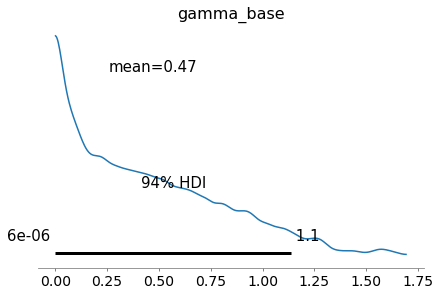

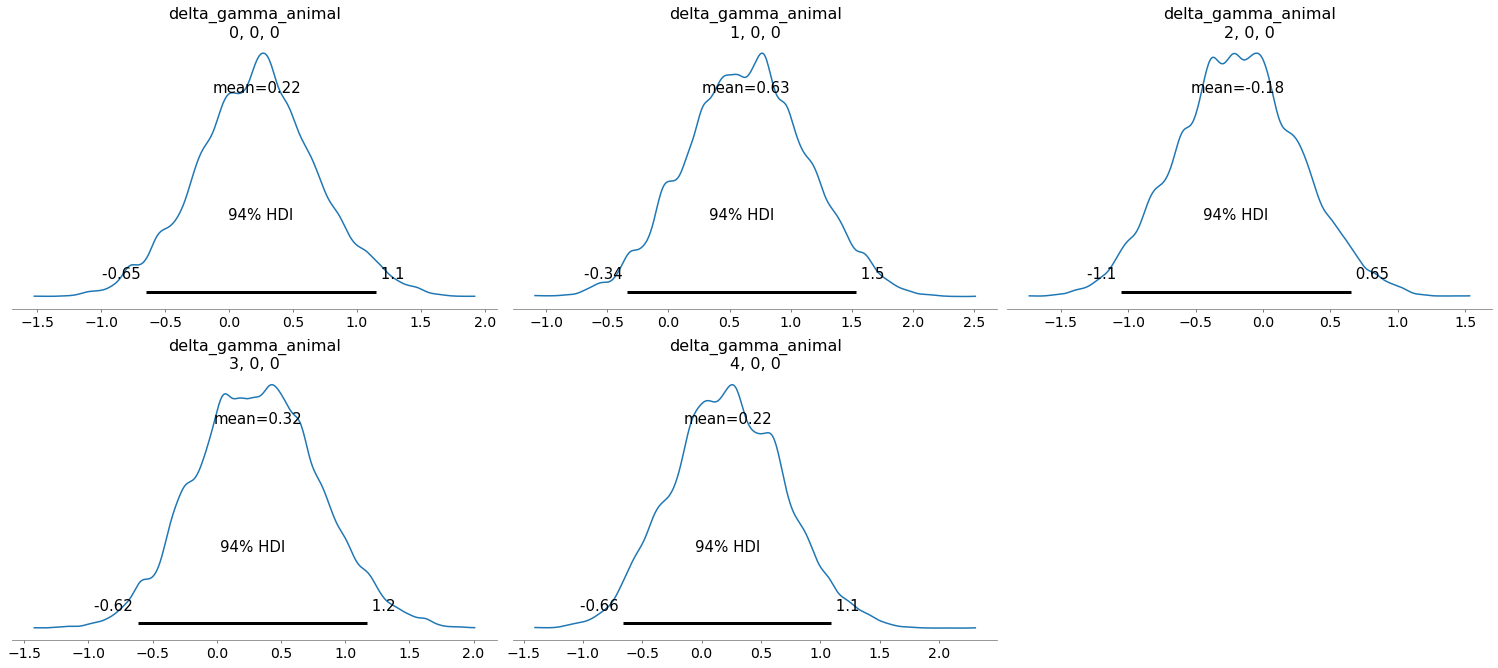

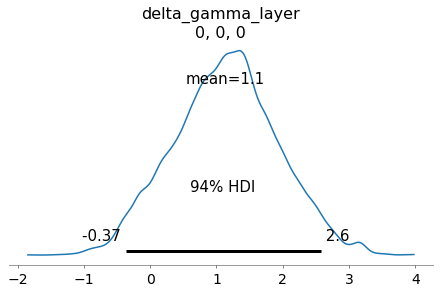

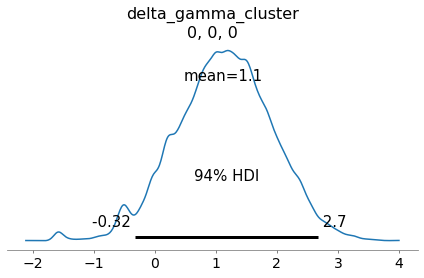

In [76]:
varName = 'gamma'
#az.plot_posterior(trace,var_names=[f'{varName}'])
az.plot_posterior(trace,var_names=[f'{varName}_base'],filter_vars='regex')
az.plot_posterior(trace,var_names=[f'{varName}_animal'],filter_vars='regex')
az.plot_posterior(trace,var_names=[f'{varName}_layer'],filter_vars='regex')
az.plot_posterior(trace,var_names=[f'{varName}_cluster'],filter_vars='regex')
plt.tight_layout()

In [77]:
with model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"delta_gamma_animal[0,0,0]",0.22,0.47,-0.65,1.15,0.01,0.01,1295.87,1115.14,1.00
"delta_gamma_animal[1,0,0]",0.63,0.49,-0.34,1.53,0.01,0.01,1235.11,1769.29,1.00
"delta_gamma_animal[2,0,0]",-0.18,0.45,-1.05,0.65,0.01,0.01,1216.28,1714.81,1.00
"delta_gamma_animal[3,0,0]",0.32,0.48,-0.62,1.17,0.01,0.01,1257.36,1174.28,1.00
"delta_gamma_animal[4,0,0]",0.22,0.47,-0.66,1.09,0.01,0.01,1321.07,2479.00,1.00
"delta_gamma_layer[0,0,0]",1.14,0.79,-0.37,2.57,0.02,0.02,1360.78,1153.70,1.00
"delta_gamma_cluster[0,0,0]",1.13,0.80,-0.32,2.67,0.02,0.02,1318.56,719.41,1.00
"delta_delta_animal[0,0,0]",-0.09,0.69,-1.44,1.15,0.02,0.01,1489.19,1099.25,1.00
"delta_delta_animal[1,0,0]",1.79,0.79,0.27,3.25,0.01,0.01,2900.27,3322.01,1.00
"delta_delta_animal[2,0,0]",-1.13,0.59,-2.18,0.02,0.01,0.01,2120.97,4416.05,1.00


In [78]:
model.deterministics

[sigma_gamma ~ HalfNormal,
 gamma_base ~ HalfNormal,
 gamma ~ Deterministic,
 sigma_delta ~ HalfNormal,
 delta_base ~ HalfNormal,
 delta ~ Deterministic]

(array([431., 126., 129.,  90.,  62.,  49.,  30.,  28.,  20.,   9.,  15.,
          5.,  13.,   8.,   4.,   5.,   3.,   4.,   1.,   4.,   1.,   1.,
          0.,   3.,   1.,   5.,   1.,   2.,   2.,   1.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. ]),
 <BarContainer object of 30 artists>)

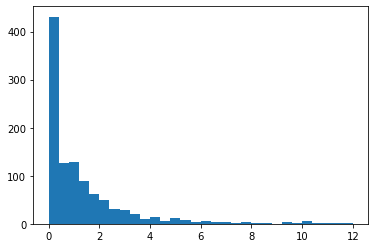

In [110]:
plt.hist(mP.spikes,np.linspace(0,12,31))